# User defined choropleths

In [2]:
import mapclassify 
import geopandas as gpd 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mx = gpd.read_file("../data/mexico/mexicojoin.shp")

>Custom classification

In [5]:
classi = mapclassify.UserDefined(
    mx.PCGDP2000, [10000, 12500, 15000]
)
classi

UserDefined

      Interval         Count
----------------------------
[ 8684.00, 10000.00] |     2
(10000.00, 12500.00] |     7
(12500.00, 15000.00] |     1
(15000.00, 54349.00] |    22

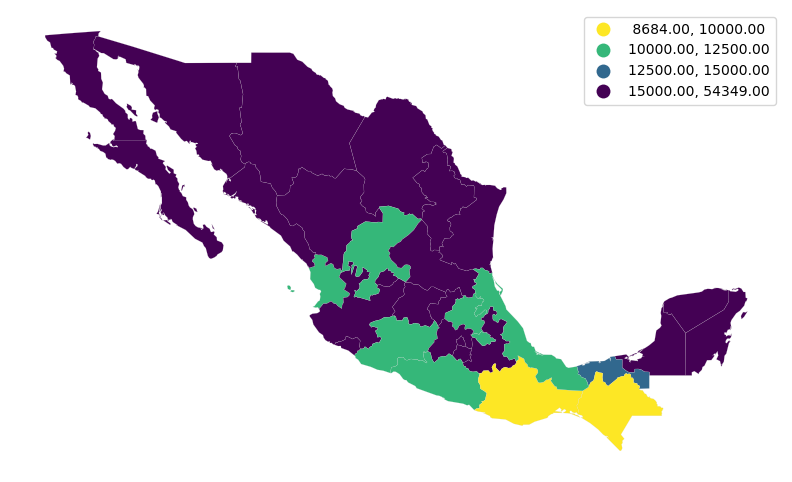

In [7]:
f, ax = plt.subplots(1, figsize=(10,6))
classi.plot(
    mx, 
    legend=True, 
    legend_kwds=dict(loc='upper right'), 
    axis_on=False, 
    cmap='viridis_r', 
    ax=ax
);

>Or with pandas

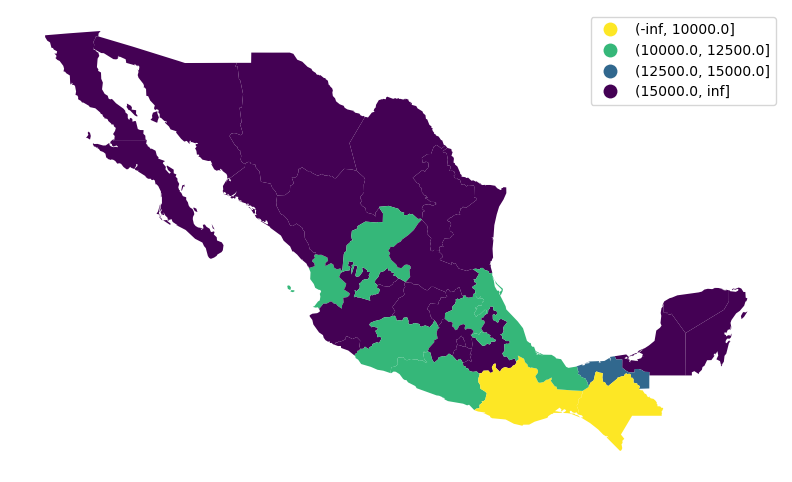

In [8]:
lbls = pd.cut(
    mx.PCGDP2000, [-np.inf, 10000, 12500, 15000, np.inf]
)
f, ax = plt.subplots(figsize=(18,6))
mx.plot(lbls, cmap='viridis_r', legend=True, ax=ax)
ax.set_axis_off();

# Pooled classifications 

Apply the same classification across multiple maps

In [9]:
years = ["PCGDP1940", "PCGDP1960", "PCGDP1980", "PCGDP2000"]
pooled = mapclassify.Pooled(mx[years], classifier="Quantiles", k=5)

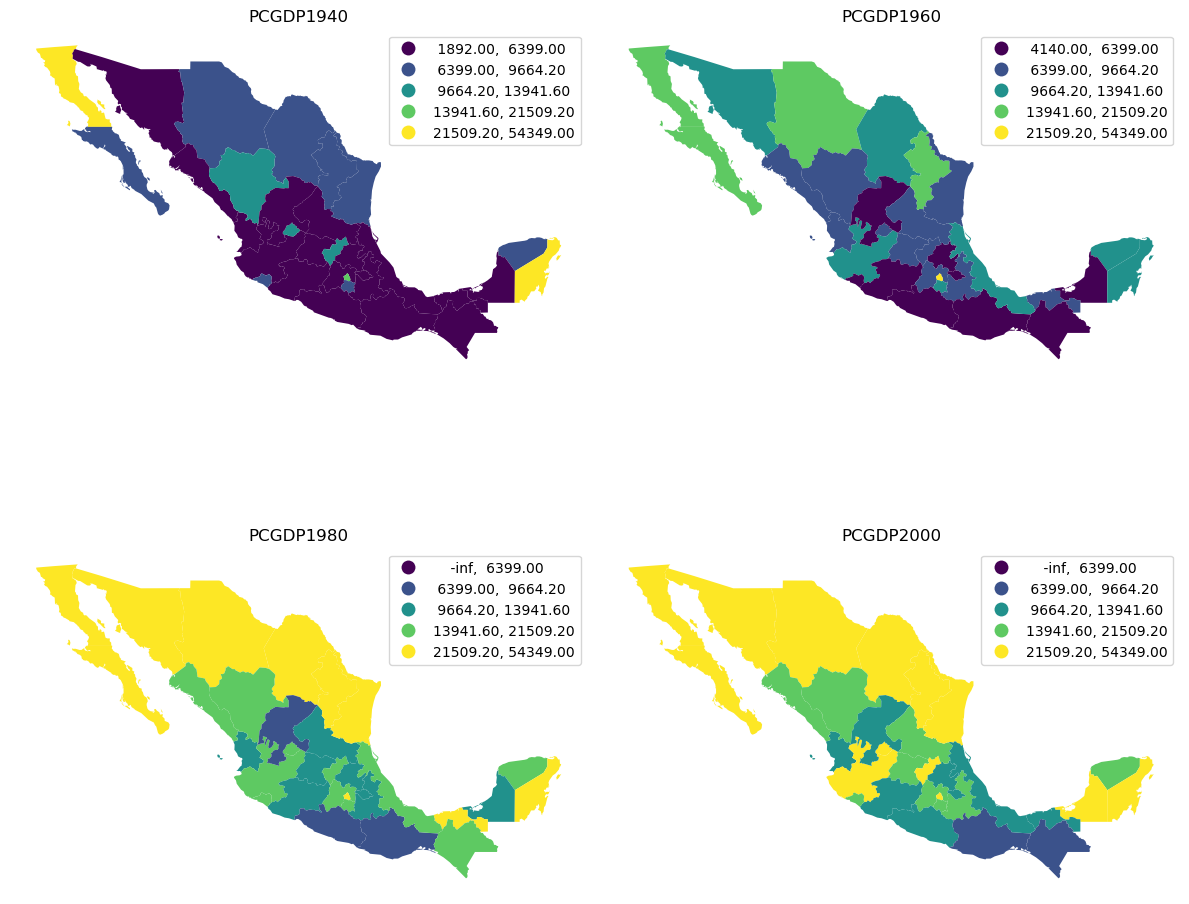

In [11]:
f, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.flatten()
for i, y in enumerate(years): 
    mx.plot(
        y, 
        scheme='UserDefined', 
        classification_kwds={
            "bins": pooled.global_classifier.bins
        }, 
        legend=True, 
        ax=axs[i]
    )
    axs[i].set_axis_off()
    axs[i].set_title(y)
plt.tight_layout();